In [1]:
%%capture
%pip install scikit-image
%pip install numpy
%pip install matplotlib
%pip install opencv-python
import cv2
import scipy
import skimage
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import os

In [2]:
img = cv2.imread('./imagens/ImagemPFuzzy02_R_Noise1.pgm', 1)
io = cv2.imread('imagens/ImagemPFuzzy02_R_Noise1.pgm', 0)


In [3]:
(M,N) = np.shape(io)

In [4]:
obj = np.zeros((M,N), np.uint8)
obj = skimage.img_as_float(obj)

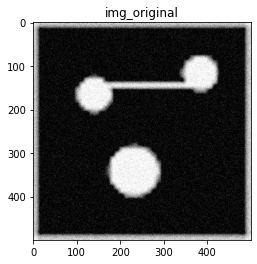

In [5]:
plt.figure()
plt.title('img_original')
plt.imshow(img, cmap='gray')

In [6]:
roi = cv2.selectROI(img)

Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!


In [7]:
cv2.destroyAllWindows()

In [8]:
cmin = roi[0]
lmin = roi[1]
cmax = roi[0] + roi[2]
lmax = roi[1] + roi[3]

In [9]:
seed_lin = np.int(lmin + np.round(roi[3]/2))
seed_col = np.int(cmin + np.round(roi[2]/2))

/tmp/ipykernel_20649/3122596233.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  seed_lin = np.int(lmin + np.round(roi[3]/2))
/tmp/ipykernel_20649/3122596233.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in N

In [10]:
lst_x, lst_y = list(), list()

In [11]:
lst_x.append(seed_col)
lst_y.append(seed_lin)

In [12]:
media = np.mean(io[lmin:lmax, cmin:cmax])
dp = np.std(io[lmin:lmax, cmin:cmax])

In [13]:
lim_sup = media+3*dp
lim_inf = media-3*dp


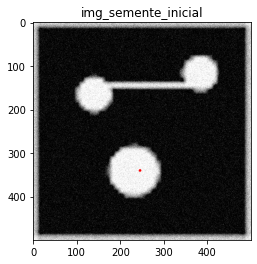

In [14]:
obj[seed_lin, seed_col] = 1
cv2.line(img, (seed_col, seed_lin), (seed_col, seed_lin), (255, 0, 0), 5)
plt.figure()
plt.title('img_semente_inicial')
plt.imshow(img, cmap='gray')

tamanho_fila atualizado = 1
direita (246, 340)
baixo (245, 341)
Para cima (245, 339)
Para esquerda (244, 340)
tamanho_fila atualizado = 4
direita (247, 340)
baixo (246, 341)
Para cima (246, 339)
tamanho_fila atualizado = 6
baixo (245, 342)
Para esquerda (244, 341)
tamanho_fila atualizado = 7
Para cima (245, 338)
Para esquerda (244, 339)
tamanho_fila atualizado = 8
Para esquerda (244, 339)
tamanho_fila atualizado = 8
direita (248, 340)
baixo (247, 341)
Para cima (247, 339)
tamanho_fila atualizado = 10
baixo (246, 342)
tamanho_fila atualizado = 10
Para cima (246, 338)
tamanho_fila atualizado = 10
baixo (245, 343)
tamanho_fila atualizado = 10
Para esquerda (244, 340)
tamanho_fila atualizado = 10
Para cima (245, 337)
Para esquerda (244, 338)
tamanho_fila atualizado = 11
Para esquerda (244, 338)
tamanho_fila atualizado = 11
Para esquerda (244, 338)
tamanho_fila atualizado = 11
direita (249, 340)
baixo (248, 341)
Para cima (248, 339)
tamanho_fila atualizado = 13
baixo (247, 342)
tamanho_fila

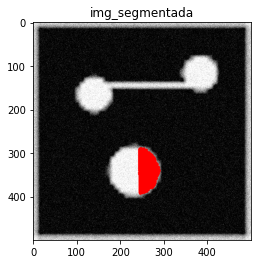

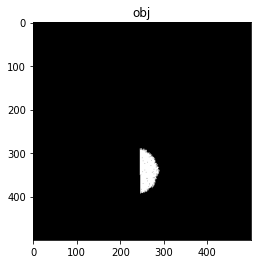

In [15]:
(tamanho_fila, ) = np.shape(lst_y)

while tamanho_fila > 0:
    print(f'tamanho_fila atualizado = {tamanho_fila}')
    seed_col = lst_x[0]
    seed_lin = lst_y[0]

    while (seed_col+1 > (N-1) or seed_col-1 < 0 or seed_lin+1>(M-1) or seed_lin-1 < 0):
        print('LOOP DE BORDA')
        lst_x.remove(seed_col)
        lst_y.remove(seed_lin)
        (tamanho_file, ) = np.shape(lst_y)
        if tamanho_file==0:
            break
        else:
            seed_col = lst_x[0]
            seed_lin = lst_y[0]
    # Direita
    if (obj[seed_lin, seed_col+1] == 0) and (io[seed_lin, seed_col+1]>lim_inf and io[seed_lin, seed_col+1]<lim_sup):
        print('direita', (seed_col+1, seed_lin))
        lst_x.append(seed_col+1)
        lst_y.append(seed_lin)

        cv2.line(img,(seed_col+1, seed_lin), (seed_col+1, seed_lin), (255,0,0), 5)
        obj[seed_lin, seed_col+1] = 1
    
    # Baixo
    if (
        obj[seed_lin+1, seed_col] == 0 and 
        (io[seed_lin+1, seed_col]>lim_inf) and 
        io[seed_lin+1, seed_col]< lim_sup
        ):
        print('baixo', (seed_col, seed_lin+1))
        lst_x.append(seed_col)
        lst_y.append(seed_lin+1)
        cv2.line(img, (seed_col, seed_lin+1), (seed_col, seed_lin+1), (255,0,0), 5)
        obj[seed_lin+1, seed_col] = 1

    # Cima
    if (
        obj[seed_lin-1, seed_col] == 0 and (io[seed_lin-1, seed_col]>lim_inf) and io[seed_lin, seed_col-1]<lim_sup
    ):
        print('Para cima', (seed_col, seed_lin-1))
        lst_x.append(seed_col)
        lst_y.append(seed_lin-1)

        cv2.line(img, (seed_col, seed_lin-1), (seed_col, seed_lin-1), (255,0,0), 5)
        obj[seed_lin-1, seed_col] = 1
    
    # Esquerda
    if (
        obj[seed_lin, seed_col-1] == 0 and (io[seed_lin, seed_col-1]>lim_inf) and io[seed_lin, seed_col-1]<lim_sup
    ):
        print('Para esquerda', (seed_col-1, seed_lin))
        lst_x.append(seed_col-1)
        lst_y.append(seed_lin)

        cv2.line(img, (seed_col-1, seed_lin), (seed_col-1, seed_lin), (255,0,0), 5)
        obj[seed_lin-1, seed_col] = 1
    if tamanho_fila == 0:
        break
    else:
        lst_x.remove(seed_col)
        lst_y.remove(seed_lin)
        (tamanho_fila, ) = np.shape(lst_y)

plt.figure()
plt.title('img_segmentada')
plt.imshow(img, cmap='gray')

plt.figure()
plt.title('obj')
plt.imshow(obj, cmap='gray')